<a href="https://colab.research.google.com/github/anu-007/make_more_hashtags/blob/main/mlp/mlp_makemore_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# load data and prepare vocab
import json

tags = []
with open('tags.json', 'r') as file:
  data = json.load(file)
  for d in data:
    tags.append(d[0])

vocab = sorted(list(set(''.join(tags))))
stoi = {s:i+1 for i, s in enumerate(vocab)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [3]:
# build dataset
import torch
import random
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline

# test, train, dev split for dataset
batch_size = 3
def build_dataset(tags):
  X, Y = [], []
  for tag in tags:
    context = [0] * batch_size
    for ch in tag + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

random.seed(42)
random.shuffle(tags)
n1 = int(0.8*len(tags))
n2 = int(0.9*len(tags))

Xtr, Ytr = build_dataset(tags[:n1])
Xdev, Ydev = build_dataset(tags[n1:n2])
Xte, Yte = build_dataset(tags[n2:])

torch.Size([6599, 3]) torch.Size([6599])
torch.Size([846, 3]) torch.Size([846])
torch.Size([834, 3]) torch.Size([834])


In [76]:
# create embeddings
vocab_len = max(stoi.values()) + 1

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_len, 2))
W1 = torch.randn((6, 200), generator=g)
B1 = torch.randn(200, generator=g)
W2 = torch.randn((200, vocab_len), generator=g)
B2 = torch.randn(vocab_len, generator=g)
parameters = [C, W1, B1, W2, B2]

In [77]:
for p in parameters:
  p.requires_grad = True

lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [78]:
lri = []
lossi = []
stepi = []

In [79]:
for i in range(15000):
  #minibatch
  ix = torch.randint(0, Xtr.shape[0], (vocab_len,))

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + B1)
  logits = h @ W2 + B2
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1 if i < 7000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  stepi.append(i)
  # lri.append(lre[i])
  lossi.append(loss.log10().item())
# print(loss.item())

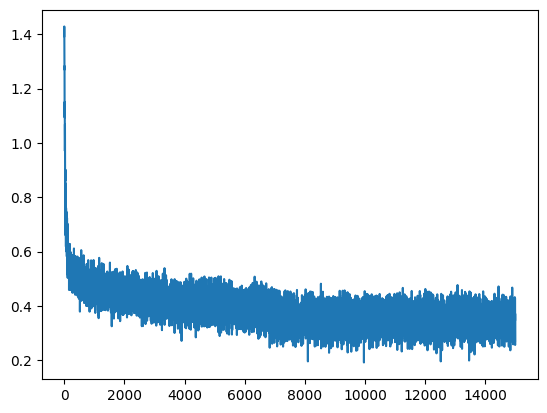

In [80]:
plt.plot(stepi, lossi)

In [81]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6)@W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.2434277534484863

In [82]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6)@W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.5409884452819824

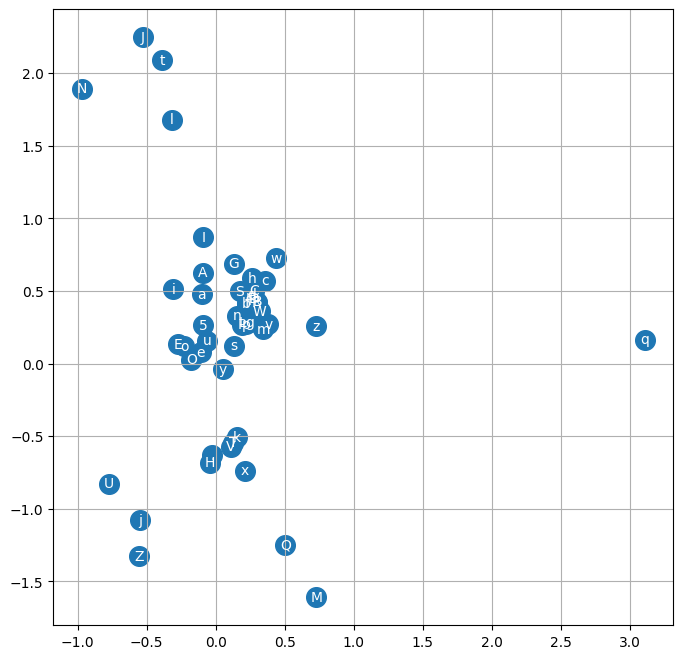

In [50]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(vocab_len):
  plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [83]:
#sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
  out = []
  context = [0] * batch_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + B1)
    logits = h @ W2 + B2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))


Bering.
Pipafer.
ecshs.
fucFoc.
wrizico.
lLeirtuir.
LogatEgragement.
Suttwabcoticming.
ceingmSdoesaccb.
Borecesrfeetali.
b.
jobsut.
secson.
ces.
Antrcve.
Enic.
Pan.
Ccehceecupeerivate.
Secicyee.
fugyast.
